In [21]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as mpl
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder, StandardScaler, normalize
from sklearn.model_selection import train_test_split

In [2]:
# Load the first dataset

db = pd.read_csv("C://Users/wawes/OneDrive/Desktop/ZETECH UNIVERSITY/Y4S2/MACHINE LEARNING/Topic 2/Salary Dataset.csv")

In [3]:
# Load the second dataset

db2 = pd.read_csv("C://Users/wawes/OneDrive/Desktop/ZETECH UNIVERSITY/Y4S2/MACHINE LEARNING/Topic 2/Partially Cleaned Salary Dataset.csv")

In [4]:
# a summary of dataset 1

db

,Company Name,Job Title,Salaries Reported,Location,Salary
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr"
1,IBM,Data Scientist,95.0,Bangalore,"₹11,91,950/yr"
2,Tata Consultancy Services,Data Scientist,66.0,Bangalore,"₹8,36,874/yr"
3,Impact Analytics,Data Scientist,40.0,Bangalore,"₹6,69,578/yr"
4,Accenture,Data Scientist,32.0,Bangalore,"₹9,44,110/yr"
...,...,...,...,...,...
4339,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo"
4340,Decimal Point Analytics,Machine Learning Developer,1.0,Mumbai,"₹7,51,286/yr"
4341,MyWays,Machine Learning Developer,1.0,Mumbai,"₹4,10,952/yr"
4342,Market Pulse Technologies,Software Engineer - Machine Learning,1.0,Mumbai,"₹16,12,324/yr"


In [5]:
# a summary of dataset 2

db2

,Unnamed: 0,Company Name,Job Title,Salaries Reported,Location,Salary
0,0,Mu Sigma,Data Scientist,105,Bangalore,648573.0
1,1,IBM,Data Scientist,95,Bangalore,1191950.0
2,2,Tata Consultancy Services,Data Scientist,66,Bangalore,836874.0
3,3,Impact Analytics,Data Scientist,40,Bangalore,669578.0
4,4,Accenture,Data Scientist,32,Bangalore,944110.0
...,...,...,...,...,...,...
4334,4339,TaiyōAI,Machine Learning Scientist,1,Mumbai,62160.0
4335,4340,Decimal Point Analytics,Machine Learning Developer,1,Mumbai,751286.0
4336,4341,MyWays,Machine Learning Developer,1,Mumbai,410952.0
4337,4342,Market Pulse Technologies,Software Engineer - Machine Learning,1,Mumbai,1612324.0


In [8]:
# a description of dataset 1

db.describe()

,Salaries Reported
count,4342.000000
mean,2.775910
std,5.146527
min,1.000000
25%,1.000000
50%,1.000000
75%,3.000000
max,105.000000


In [9]:
# a description of dataset 2

db2.describe()

,Unnamed: 0,Salaries Reported,Salary
count,4339.000000,4339.000000,4.339000e+03
mean,2169.900899,2.777138,1.119885e+06
std,1253.742778,5.148095,4.300905e+06
min,0.000000,1.000000,1.081400e+04
25%,1084.500000,1.000000,4.199380e+05
50%,2169.000000,1.000000,7.062830e+05
75%,3255.500000,3.000000,1.196675e+06
max,4343.000000,105.000000,1.661404e+08


In [10]:


db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4344 entries, 0 to 4343
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Company Name       4341 non-null   object 
 1   Job Title          4344 non-null   object 
 2   Salaries Reported  4342 non-null   float64
 3   Location           4344 non-null   object 
 4   Salary             4344 non-null   object 
dtypes: float64(1), object(4)
memory usage: 169.8+ KB


In [11]:
db2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4339 entries, 0 to 4338
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         4339 non-null   int64  
 1   Company Name       4339 non-null   object 
 2   Job Title          4339 non-null   object 
 3   Salaries Reported  4339 non-null   int64  
 4   Location           4339 non-null   object 
 5   Salary             4339 non-null   float64
dtypes: float64(1), int64(2), object(3)
memory usage: 203.5+ KB


In [12]:
# Check for duplicated values on both datasets

db.duplicated().sum()

0

In [13]:
db2.duplicated().sum()

0

In [15]:
# Check for null values on the dataset

db.isnull().sum()

Company Name         3
Job Title            0
Salaries Reported    2
Location             0
Salary               0
dtype: int64

In [16]:
# Replacing null values with zeros

db.fillna(0, inplace=True)

In [17]:
db.isnull().sum()

Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [18]:
db2.isnull().sum()

Unnamed: 0           0
Company Name         0
Job Title            0
Salaries Reported    0
Location             0
Salary               0
dtype: int64

In [19]:
# Merging the two datasets to form dataset db3

db3=pd.merge(db, db2,on='Company Name')

In [20]:
db3

,Company Name,Job Title_x,Salaries Reported_x,Location_x,Salary_x,Unnamed: 0,Job Title_y,Salaries Reported_y,Location_y,Salary_y
0,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",0,Data Scientist,105,Bangalore,648573.0
1,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",961,Data Scientist,1,Bangalore,722247.0
2,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",1466,Data Scientist,1,Hyderabad,406548.0
3,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",1716,Data Scientist,1,New Delhi,559071.0
4,Mu Sigma,Data Scientist,105.0,Bangalore,"₹6,48,573/yr",1862,Data Scientist,1,Mumbai,2498867.0
...,...,...,...,...,...,...,...,...,...,...
21221,Zipgigz,Machine Learning Engineer,1.0,Mumbai,"₹8,145/mo",4336,Machine Learning Engineer,1,Mumbai,97740.0
21222,SCI,Machine Learning Engineer,1.0,Mumbai,"₹15,87,265/yr",4337,Machine Learning Engineer,1,Mumbai,1587265.0
21223,Myraa Technologies,Machine Learning Scientist,1.0,Mumbai,"₹23,173/mo",4338,Machine Learning Scientist,1,Mumbai,278076.0
21224,TaiyōAI,Machine Learning Scientist,1.0,Mumbai,"₹5,180/mo",4339,Machine Learning Scientist,1,Mumbai,62160.0


In [34]:
# creating a training and test dataset for regression tests

train_data,test_data = train_test_split( db3, test_size=0.25)
train_data
db3.boxplot('Salaries Reported_x')
mpl.figure(figsize=(15, 5))
sb.barplot(x=db3['Job Title_x'], y=db3['Salary_y'])
mpl.xticks(rotation='horizontal')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'Data Scientist'),
  Text(1, 0, 'Data Analyst'),
  Text(2, 0, 'Data Engineer'),
  Text(3, 0, 'Machine Learning Engineer'),
  Text(4, 0, 'Senior Data Scientist'),
  Text(5, 0, 'Data Science'),
  Text(6, 0, 'Junior Data Scientist'),
  Text(7, 0, 'Lead Data Scientist'),
  Text(8, 0, 'Machine Learning Consultant'),
  Text(9, 0, 'Machine Learning Data Associate'),
  Text(10, 0, 'Machine Learning Data Associate I'),
  Text(11, 0, 'Machine Learning Associate'),
  Text(12, 0, 'Machine Learning Data Associate II'),
  Text(13, 0, 'Machine Learning Data Analyst'),
  Text(14, 0, 'Senior Machine Learning Engineer'),
  Text(15, 0, 'Data Science Associate'),
  Text(16, 0, 'Data Science Consultant'),
  Text(17, 0, 'Data Science Manager'),
  Text(18, 0, 'Software Engineer - Machine Learning'),
  Text(19, 0, 'Data Science Lead'),
  Text(20, 0, 'Machine Learning Software Engi

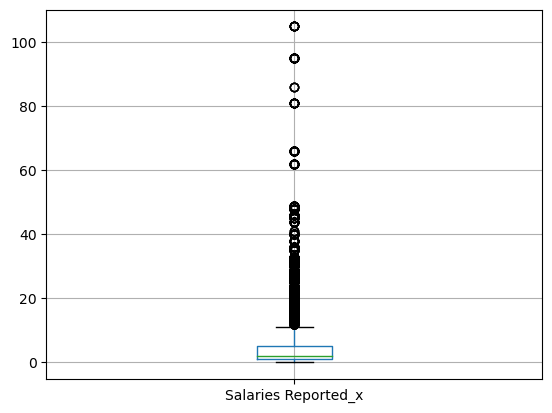

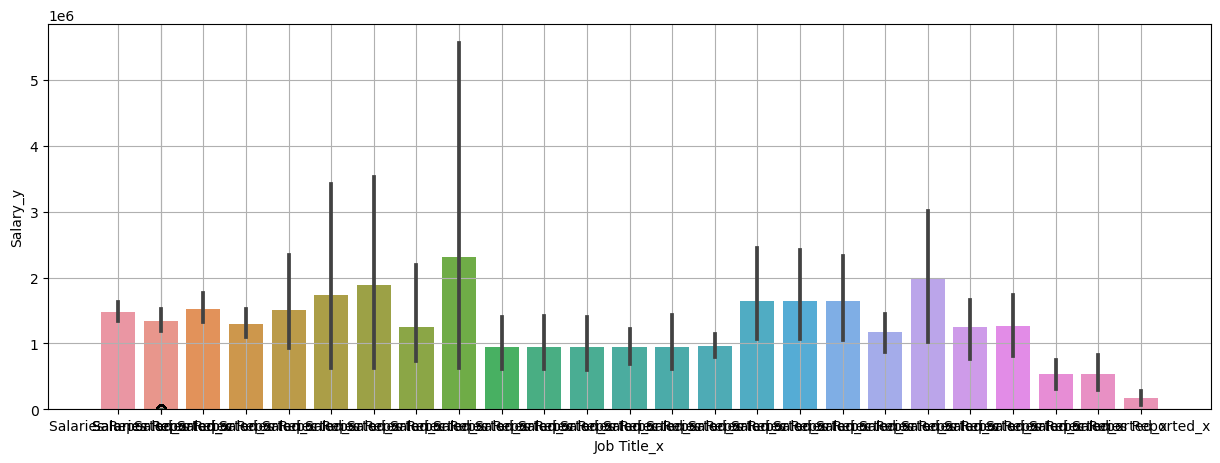

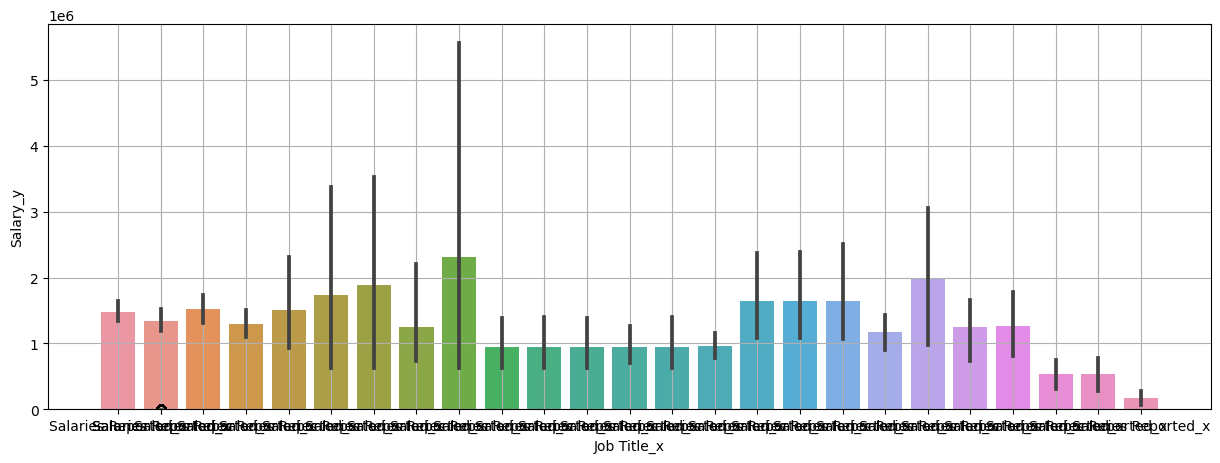

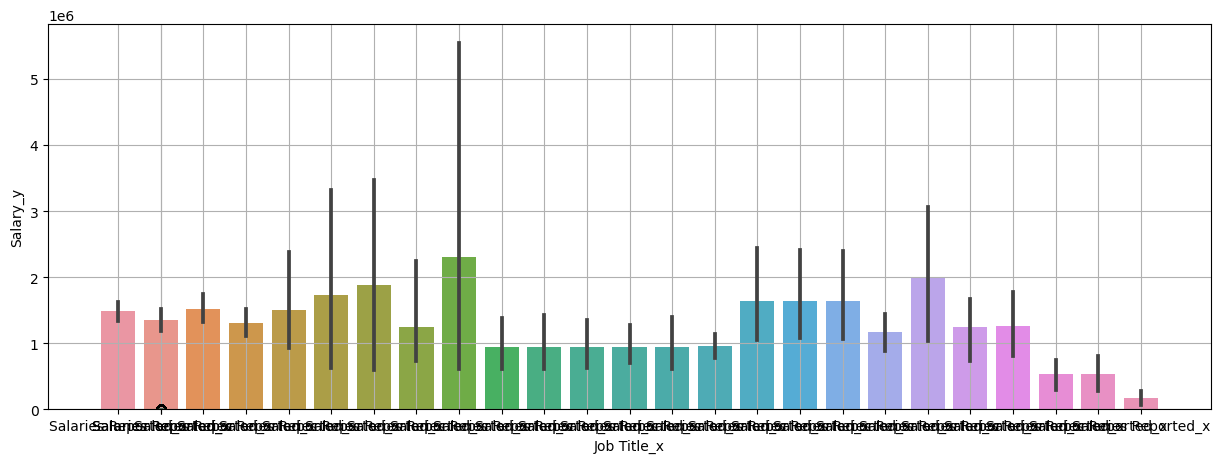

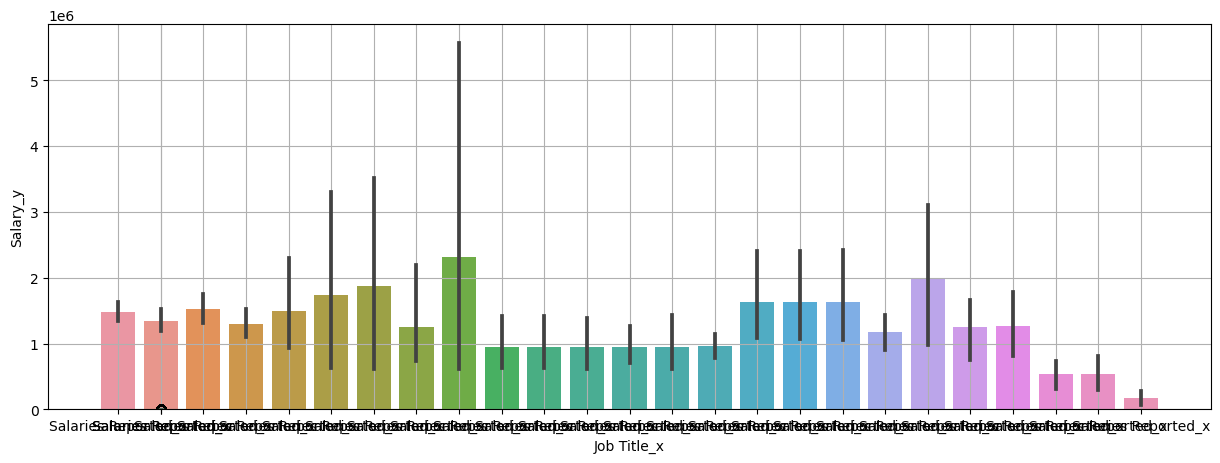

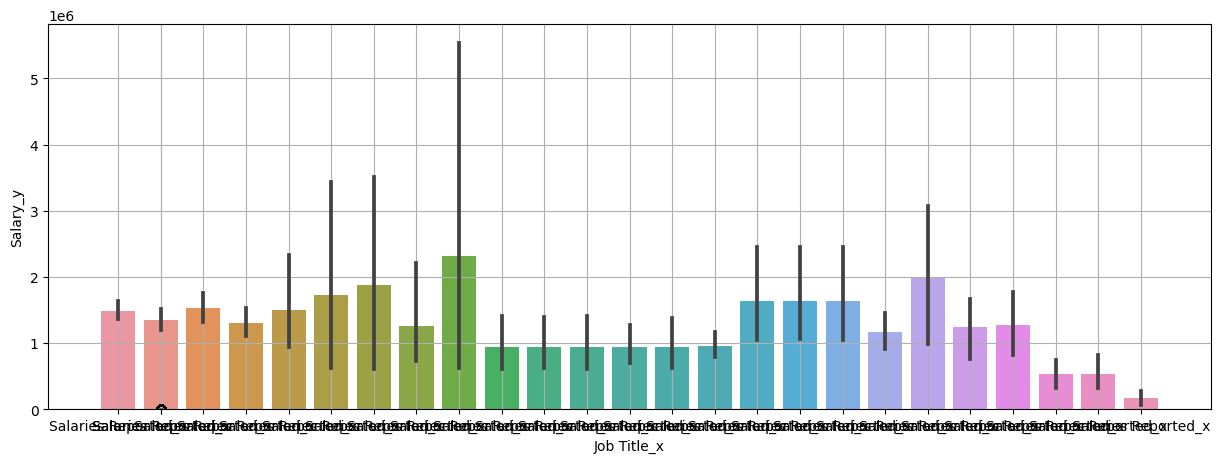

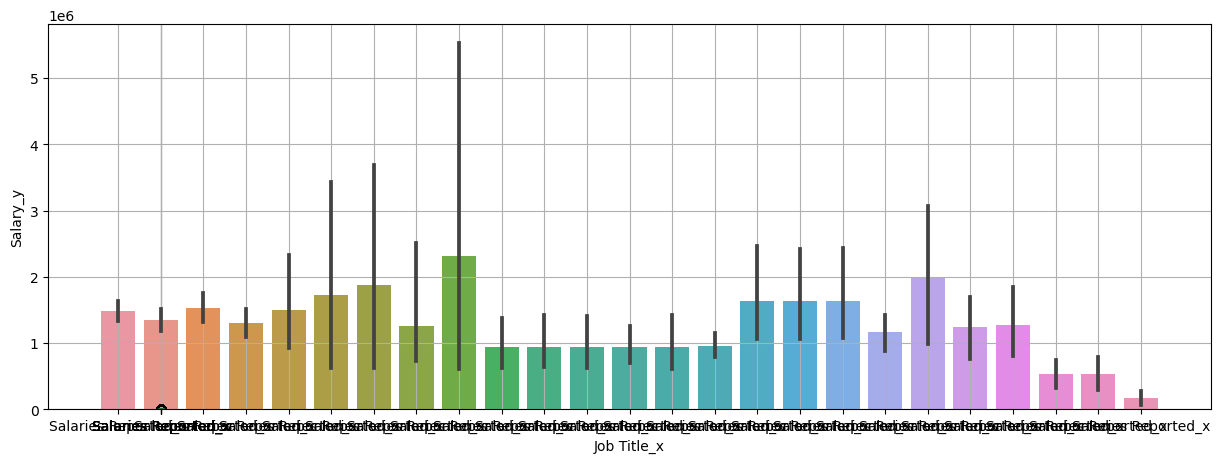

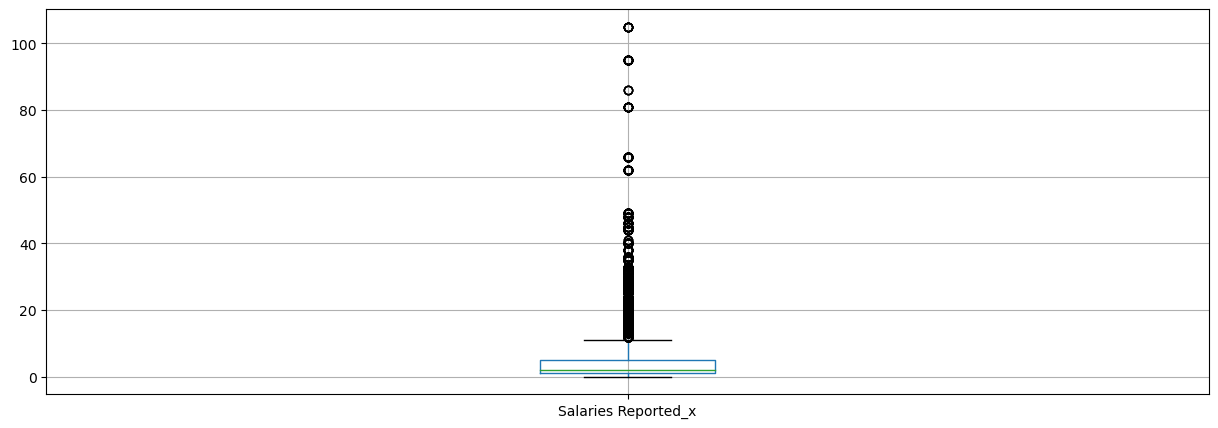

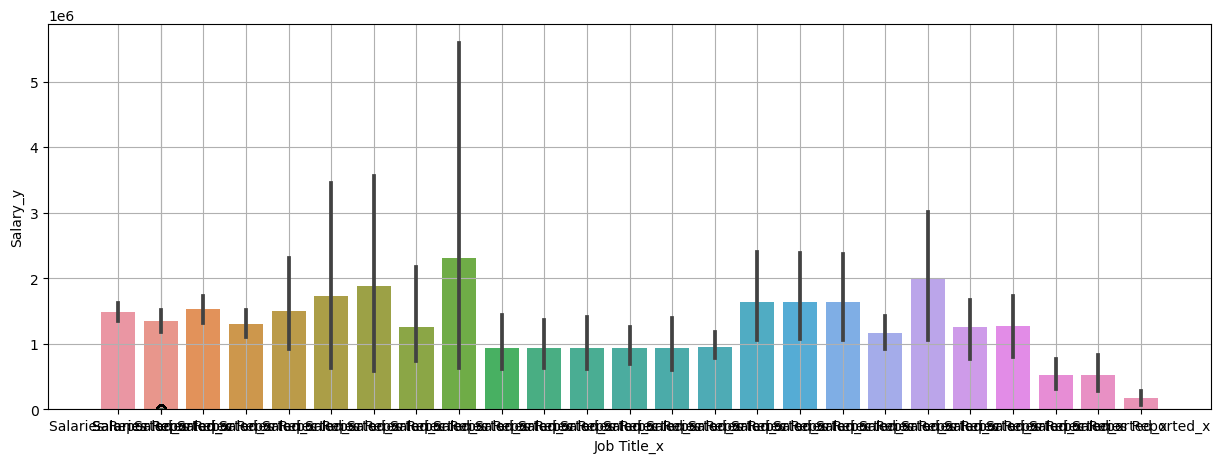

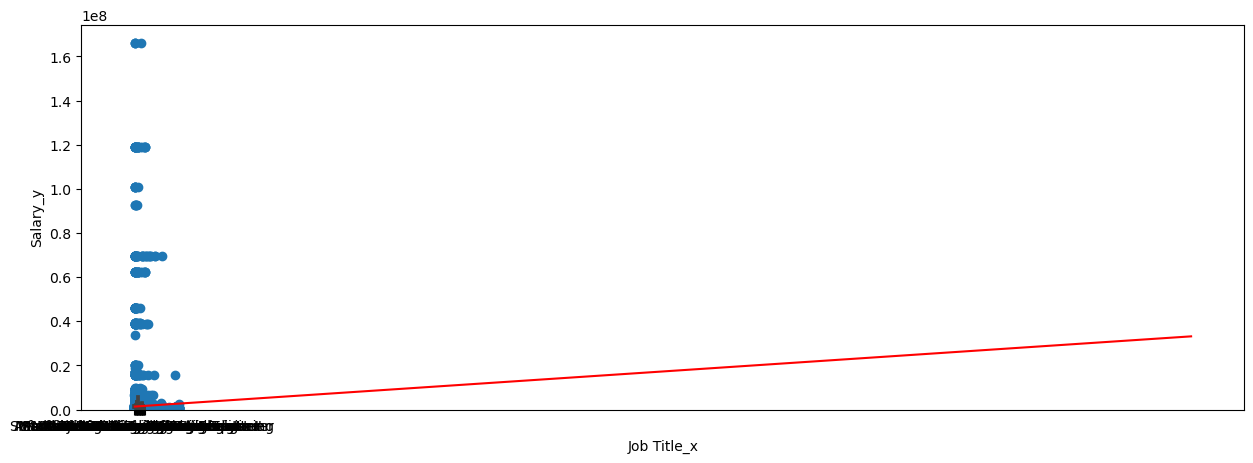

In [36]:
X = db3['Salaries Reported_x'].values.reshape(-1, 1)
y = db3['Salary_y'].values.reshape(-1, 1)
regressor = LinearRegression()
regressor.fit(X, y)
new_data = np.array([1, 2, 3, 4, 5, 2500]).reshape(-1, 1)
predictions = regressor.predict(new_data)
mpl.scatter(X, y)
mpl.plot(new_data, predictions, color='red')
mpl.show()